# **Matrices Homogeneas en un espacio tridimensional**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [4]:
import numpy as np
from sympy import*
init_printing()

### Declaración de variables simbolicas

In [5]:
## Variables Simbolicas
theta = symbols("theta",  real=True)
phi = symbols("phi",  real=True)
psi = symbols("psi",  real=True)
tx = symbols("tx",  real=True)
ty = symbols("ty",  real=True)
tz = symbols("tz",  real=True)

### Rotacion eje x

In [6]:
H_x = Matrix([[1, 0, 0, 0], [0, cos(phi), -sin(phi), 0], [0, sin(phi), cos(phi), 0], [0, 0, 0, 1]])
H_x

⎡1    0        0     0⎤
⎢                     ⎥
⎢0  cos(φ)  -sin(φ)  0⎥
⎢                     ⎥
⎢0  sin(φ)  cos(φ)   0⎥
⎢                     ⎥
⎣0    0        0     1⎦

### Rotacion eje y

In [7]:
H_y = Matrix([[cos(theta), 0, sin(theta), 0], [0, 1, 0, 0], [-sin(theta), 0, cos(theta), 0], [0, 0, 0, 1]])
H_y


⎡cos(θ)   0  sin(θ)  0⎤
⎢                     ⎥
⎢   0     1    0     0⎥
⎢                     ⎥
⎢-sin(θ)  0  cos(θ)  0⎥
⎢                     ⎥
⎣   0     0    0     1⎦

### Rotacion eje z

In [8]:
H_z = Matrix([[cos(psi), -sin(psi), 0, 0], [sin(psi), cos(psi), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
H_z

⎡cos(ψ)  -sin(ψ)  0  0⎤
⎢                     ⎥
⎢sin(ψ)  cos(ψ)   0  0⎥
⎢                     ⎥
⎢  0        0     1  0⎥
⎢                     ⎥
⎣  0        0     0  1⎦

### Composicion de Matrices Homogeneas

Probando la conmutatividad de las matrices homogeneas

In [9]:
H = H_z@H_y@H_x
H

⎡cos(ψ)⋅cos(θ)  sin(φ)⋅sin(θ)⋅cos(ψ) - sin(ψ)⋅cos(φ)  sin(φ)⋅sin(ψ) + sin(θ)⋅cos(φ)⋅cos(ψ)   0⎤
⎢                                                                                             ⎥
⎢sin(ψ)⋅cos(θ)  sin(φ)⋅sin(ψ)⋅sin(θ) + cos(φ)⋅cos(ψ)  -sin(φ)⋅cos(ψ) + sin(ψ)⋅sin(θ)⋅cos(φ)  0⎥
⎢                                                                                             ⎥
⎢   -sin(θ)                sin(φ)⋅cos(θ)                          cos(φ)⋅cos(θ)              0⎥
⎢                                                                                             ⎥
⎣      0                         0                                      0                    1⎦

In [10]:
H = H_x@H_y@H_z
H

⎡           cos(ψ)⋅cos(θ)                         -sin(ψ)⋅cos(θ)                  sin(θ)      0⎤
⎢                                                                                              ⎥
⎢sin(φ)⋅sin(θ)⋅cos(ψ) + sin(ψ)⋅cos(φ)  -sin(φ)⋅sin(ψ)⋅sin(θ) + cos(φ)⋅cos(ψ)  -sin(φ)⋅cos(θ)  0⎥
⎢                                                                                              ⎥
⎢sin(φ)⋅sin(ψ) - sin(θ)⋅cos(φ)⋅cos(ψ)  sin(φ)⋅cos(ψ) + sin(ψ)⋅sin(θ)⋅cos(φ)   cos(φ)⋅cos(θ)   0⎥
⎢                                                                                              ⎥
⎣                 0                                      0                          0         1⎦

# **Experimento 1**
#### Comprobar que una secuencia de rotaciones produce el mismo resultado que una composición de matrices homogeneas

In [11]:
P0 = np.array([1, 1, 0])

1. Probando solo con matrices de rotación en 3D

In [12]:
#Matriz de rotacion 3D sobre el eje x
R_x = Matrix([[1, 0, 0], [0, cos(theta), -sin(theta)], [0, sin(theta), cos(theta)]])
R_x

⎡1    0        0   ⎤
⎢                  ⎥
⎢0  cos(θ)  -sin(θ)⎥
⎢                  ⎥
⎣0  sin(θ)  cos(θ) ⎦

In [13]:
#Matriz de rotacion 3D sobre el eje y
R_y = Matrix([[cos(theta), 0, sin(theta)], [0, 1, 0], [-sin(theta), 0, cos(theta)]])
R_y

⎡cos(θ)   0  sin(θ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(θ)  0  cos(θ)⎦

In [14]:
theta_val = np.pi/9 # 20 grados en radianes
R_x_p0 = np.array(R_x.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rx
R_y_p0 = np.array(R_y.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Ry

P0_rotado_x = np.dot(R_x_p0, P0) #Producto punto entre la matrix de rotación y el vector de posición del punto
P0_rotado_y = np.dot(R_y_p0, P0_rotado_x) #Producto punto entre la matrix de rotación y el vector de posición del punto

print(P0_rotado_y)

[ 1.0566704   0.93969262 -0.02062634]


2. Ahora probamos con la composición de matrices homogeneas

In [15]:
#Se convierte el punto 3D a un punto de coordenadas homogeneas

P0_homogeneo = np.append(P0, 1)
P0_homogeneo = np.reshape(P0_homogeneo, (4, 1))
print(P0)
print(P0_homogeneo)

[1 1 0]
[[1]
 [1]
 [0]
 [1]]


In [16]:
#Se realiza la composición de las matrices homogeneas para x y y
Hxy = H_y@H_x
Hxy

⎡cos(θ)   sin(φ)⋅sin(θ)  sin(θ)⋅cos(φ)  0⎤
⎢                                        ⎥
⎢   0        cos(φ)         -sin(φ)     0⎥
⎢                                        ⎥
⎢-sin(θ)  sin(φ)⋅cos(θ)  cos(φ)⋅cos(θ)  0⎥
⎢                                        ⎥
⎣   0           0              0        1⎦

In [17]:
theta_val = np.pi/9 # 20 grados en radianes
phi_val = np.pi/9 # 20 grados en radianes

Hxy_p0 = np.array(Hxy.subs({phi: phi_val, theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rx
Hxy_p0

array([[ 0.93969262,  0.11697778,  0.3213938 ,  0.        ],
       [ 0.        ,  0.93969262, -0.34202014,  0.        ],
       [-0.34202014,  0.3213938 ,  0.88302222,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [18]:
P0_rotado_Hxy = np.dot(Hxy_p0, P0_homogeneo)
P0_rotado_Hxy

array([[ 1.0566704 ],
       [ 0.93969262],
       [-0.02062634],
       [ 1.        ]])

# **Actividad**

* Calcule las siguientes matrices homogeneas

# **Integrantes**
Jorge Acosta, Mausel Perez, Waldir Toscano

# **Resultados aquí debajo**

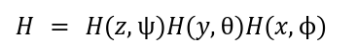

In [19]:
H = H_z@H_y@H_x
psi_val = np.pi*53/180 # 53 grados en radianes
theta_val = np.pi*56/180 # 56 grados en radianes
phi_val = np.pi*2/180 # 2 grados en radianes

Hzyx = np.array(H.subs({phi: phi_val, theta: theta_val, psi: psi_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rx
Hzyx

np.dot(Hzyx, P0_homogeneo)

array([[-0.444206  ],
       [ 1.07114664],
       [-0.80952202],
       [ 1.        ]])

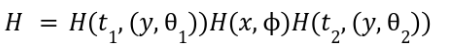

In [20]:
H_t = Matrix([[cos(theta), 0, sin(theta), tx*cos(theta)+tz*sin(theta)], [0, 1, 0, ty], [-sin(theta), 0, cos(theta), (tz*cos(theta))-(tx*sin(theta))], [0, 0, 0, 1]])
H_t

⎡cos(θ)   0  sin(θ)  tx⋅cos(θ) + tz⋅sin(θ) ⎤
⎢                                          ⎥
⎢   0     1    0               ty          ⎥
⎢                                          ⎥
⎢-sin(θ)  0  cos(θ)  -tx⋅sin(θ) + tz⋅cos(θ)⎥
⎢                                          ⎥
⎣   0     0    0               1           ⎦

In [21]:
tx_val = 3 #
ty_val = 0 #
tz_val = 0 #
theta_val = np.pi*6/180 #6 grados en radianes

H_1_subs = np.array(H_t.subs({tx: tx_val, ty: ty_val, tz: tz_val, theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rx
H_1_subs
phi_val = np.pi*2/180 # 2 grados en radianes

H_2_subs = np.array(H_x.subs({phi: phi_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rx

tx_val = 1 #
ty_val = 1 #
tz_val = 0 #
theta_val = np.pi*-6/180 # -6 grados en radianes

H_3_subs = np.array(H_t.subs({tx: tx_val, ty: ty_val, tz: tz_val, theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rx


H = H_1_subs@H_2_subs@H_3_subs
H

np.dot(H, P0_homogeneo)

array([[ 4.99084836],
       [ 1.99148567],
       [-0.24429542],
       [ 1.        ]])

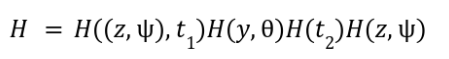

In [22]:
H_tz = Matrix([[cos(psi), -sin(psi), 0, 0], [sin(psi), cos(psi), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
H_tz

⎡cos(ψ)  -sin(ψ)  0  0⎤
⎢                     ⎥
⎢sin(ψ)  cos(ψ)   0  0⎥
⎢                     ⎥
⎢  0        0     1  0⎥
⎢                     ⎥
⎣  0        0     0  1⎦

In [23]:
tx_val = 1 #
ty_val = 1 #
tz_val = 0 #
psi_val = np.pi*53/180 # 2 grados en radianes

H_tz_subs = np.array(H_tz.subs({tx: tx_val, ty: ty_val, tz: tz_val, psi: psi_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rx
H_tz_subs

theta_val = np.pi*56/180 #56 grados en radianes
H_ty_subs = np.array(H_y.subs({ty: ty_val, theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rx
H_ty_subs

t = np.array([tx_val, ty_val, tz_val])
matriz_homogenea = np.eye(4)
matriz_homogenea[:3, 3] = t
matriz_homogenea

psi_val = np.pi*53/180 # 2 grados en radianes
H_zt_subs=np.array(H_z.subs({tz: tz_val, psi: psi_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rx
H_zt_subs

H=H_tz_subs@H_ty_subs@matriz_homogenea@H_zt_subs
H

np.dot(H, P0_homogeneo)










array([[-1.64679048],
       [ 1.80332018],
       [-0.66586599],
       [ 1.        ]])

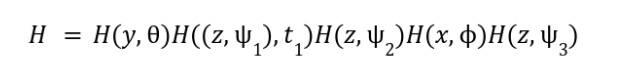

In [31]:
Hty = Matrix([[cos(theta), 0, sin(theta), 0], [0, 1, 0, 0], [-sin(theta), 0, cos(theta), 0], [0, 0, 0, 1]])
Hty

theta_val = np.pi*56/180

Hty2 = np.array(Hty.subs({theta: theta_val})).astype(np.float64)
Hty2

Hpsiz = Matrix ([[cos(psi), -sin(psi), 0, tx], [sin(psi), cos(psi), 0, ty], [0, 0, 1, tz], [0, 0, 0, 1]])
Hpsiz

tx_val = 3
ty_val = 0
tz_val = 0
psi_val = np.pi*11/180

Hps2 = np.array(Hpsiz.subs({psi: psi_val,tx:tx_val, ty:ty_val,tz:tz_val})).astype(np.float64)
Hps2

Hty3 = Matrix([[cos(psi), -sin(psi), 0, 0], [sin(psi), cos(psi), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
Hty3
psi_val = np.pi*-3/180

Hty4 = np.array(Hty3.subs({psi: psi_val})).astype(np.float64)
Hty4


Hpx = Matrix([[1, 0, 0, 0], [0, cos(phi), -sin(phi), 0], [0, sin(phi), cos(phi), 0], [0, 0, 0, 1]])
Hpx
phi_val = np.pi*2/180

Hp4 = np.array(Hpx.subs({phi: phi_val})).astype(np.float64)
Hp4


Hpsi3 = Matrix([[cos(psi), -sin(psi), 0, 0], [sin(psi), cos(psi), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
Hpsi3
psi_val = np.pi*278/180

Hpsi5 = np.array(Hpsi3.subs({psi: psi_val})).astype(np.float64)
Hpsi5

H = Hty2 @ Hps2 @ Hty4 @ Hp4 @ Hpsi5
H

np.dot(H, P0_homogeneo)

array([[ 2.34457881],
       [-0.68511092],
       [-3.52909827],
       [ 1.        ]])